
Shortcoming of Linear Regrssion

<p align="center">
  <img src="../markdown-images/linear_reg_shortcoming.png" width="700">
</p>



#### Logistic regression

The goal of binary logistic regression is to train a classifier that can make a binary decision about the class of a new input observation. Here the **sigmoid** classifier is introduced to help us make this decision.

Consider a single input observation $x$, which we will represent by a vector of feautres $[x_1, x_2, ...,x_n]$. The classifier output $y$ can be 1 (meaning the observation is the member of the class) or 0(the observation is not a memeber of the class). We want to know the probability $P(y=1|x)$ that this observation is a member of the class.

Logistic regression solves this task by learning, from a training set, a vector of **weights** and a **bias** term. Each weight is $w_i$ is a real number, and is associated with one of the input features $x_i$. 

To make a decision on a test instance, after we've learned the weights in training the classifier first multiplies each $x_i$ by its weight $w_i$, sums up the weighted features, and adds the bias term $b$. The resulting single number $z$ expresses the weighted sum of the evidence for the class. <br/>

$z = (\sum_{i=1}^{n}w_i x_i) + b$ <br/>

$z = w.x + b$

**Sigmoid function**

The sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$ takes a real value number and maps it to the ragne $[0,1]$. <br/>

<p align="center">
  <img src="../markdown-images/sigmoid.png" width="700">
</p>

To create a probability, we'll pass $z$ through the **sigmoid** functio, $\sigma(z)$. The sigmoid function is also called the **logistic function**, and gives logistic regression its name. The sigmoid has the following equation shown graphically: <br/>
$\sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+exp(-z)}$ <br/>

If we apply sigmoid to the sum of the weighted features we get a number between 0 and 1. To make it a probability, we just need to make sure the two cases, $p(y=1)$ and $p(y=0)$, sum to 1.



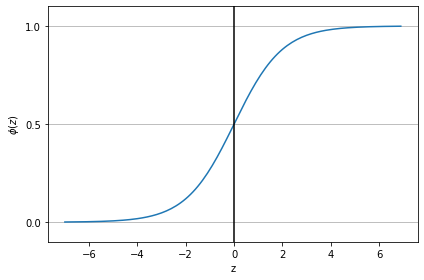

In [1]:
# Plottting a sigmoid function

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0,0.5,1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### Classification with Logistic Regression

The sigmoid function gives us a way to take an instance $x$ and compute the probability $P(y=1|x)$.

How do we make decision about which class to apply to a test instance *x*? For a given *x*, we say yes if the probability $P(y=1|x)$ is more than 0.5, and no otherwise. We call 0.5 the **decision boundry**: <br/>
$
decision(x) = \begin{cases}
  1, & \text{if } P(y=1 |x) > 0.5, \\
  0, & \text{otherwise}.
\end{cases}
$

#### Learning in Logistic Regression

Logistic regression is an instance of supervised classification in which we know the correct label $y$ (either 0 or 1) for each observation $x$. What the system produces using the sigmoid fucntion ($\sigma (x)$) is $\hat y$, the system's estimate of the true $y$.  We want to learn the parameters $w$ and $b$ that makes $\hat y$ for each training observation as close as possible to the true y. 

This requires two components. The first metric for how close the current label ($\hat y$) is to the true label $y$. We take the distance between the system output and the true output. We call this the **loss** function or the **cost** function. 

The second thing that we need is an optimization algorithm for iteratively updating the weights so as to minimize the loss function. The standard algorith for this is **gradient descent**. 


#### The cross-entropy loss function

The cost function for logistic regression is shown below: <br/>

$J(w) = \sum_{i=1} ^ {n} [-y^{(i)}log(\phi (z^{(i)})) - (1 - y^{(i)})log(1 - \phi(z^{(i)}))]$

To get a better grasp of this cost functin, let's take a look at the cost that we calculate for one single training example: <br/>
$ J(\phi (z), y; w) = -y^{(i)}log(\phi (z^{(i)})) - (1 - y^{(i)})log(1 - \phi(z^{(i)})) $ <br/>

Looking at the equation, we can see that the first term becomes zero if y=0, and the second term becomes zero if y=1. <br/>
$
J(\phi (z), y; w) = \begin{cases}
  -log(\phi (z)), & \text{if y = 1} P(y=1 |x) > 0.5, \\
  -log(1-\phi (z)), & \text{if y = 0}.
\end{cases}
$
<br/>



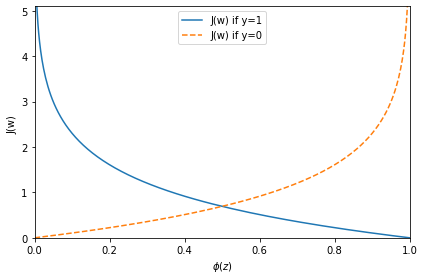

In [2]:
## Illustrating the cost of classifying for a single training example

def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w) ')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#### Linear regression

import pandas as pd
import matplotlib.pyplot as plt

